In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats

data = pd.read_csv("C:/Users/pushp/Downloads/iDM/General/Student_v2.csv")

data

,PG_CGA,Year,GMAT score,UG CGPA,Number of friends,Number of classes present,Number of hours studied,Register Number
0,7.6950,1952,605,8.535304,155,32,4.903273,12808ABC
1,8.2393,1953,691,8.752756,82,30,4.513093,13288ABC
2,7.7858,1955,507,8.651894,134,29,5.114469,3438ABC
3,6.9845,1957,423,8.148109,107,26,5.153673,3167ABC
4,6.8772,1958,584,8.519016,192,25,4.583450,2966ABC
...,...,...,...,...,...,...,...,...
145,6.0941,1974,576,7.831375,187,10,6.127504,14526ABC
146,7.0920,1975,574,8.611548,168,7,5.589528,2176ABC
147,7.0211,1976,422,8.633162,242,6,6.296413,1290ABC
148,6.0587,1977,824,7.757483,85,6,5.905570,14556ABC


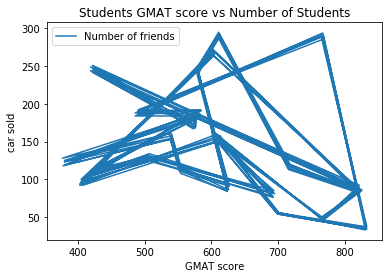

In [3]:
data.plot('GMAT score', 'Number of friends')
plt.ylabel('car sold')
plt.title('Students GMAT score vs Number of Students')
plt.show()

In [6]:
t = data['GMAT score']
c = data['Number of friends']

import statsmodels.api as s
t = s.add_constant(t)
model1 = s.OLS(c,t)
result = model1.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:      Number of friends   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     12.55
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           0.000530
Time:                        14:36:30   Log-Likelihood:                -850.87
No. Observations:                 150   AIC:                             1706.
Df Residuals:                     148   BIC:                             1712.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        244.4366     27.775      8.800      0.0

In [10]:
from sklearn.model_selection import train_test_split

x = data["GMAT score"].values.reshape(-1,1)
y = data['Number of friends'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 88)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 1), (30, 1), (120, 1), (30, 1))

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()

reg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
reg.intercept_

array([237.1005967])

In [13]:
reg.coef_

array([[-0.14870957]])

In [15]:
y_predict = reg.predict(x_test)
y_predict

array([[145.9416291 ],
       [151.59259283],
       [146.09033867],
       [164.23290645],
       [162.29968201],
       [151.29517369],
       [113.37423284],
       [154.56678427],
       [145.9416291 ],
       [151.59259283],
       [150.84904497],
       [164.82774473],
       [176.57580092],
       [144.00840466],
       [151.44388326],
       [114.86132856],
       [123.04035502],
       [146.23904824],
       [147.42872482],
       [155.01291299],
       [180.59095936],
       [114.26649027],
       [150.40291626],
       [144.30582381],
       [146.53646739],
       [151.14646412],
       [174.79128605],
       [147.42872482],
       [174.34515734],
       [130.77325276]])

In [21]:
mean_squared_error(y_test, y_predict)


4164.796076864396

In [17]:
reg.score(x_test, y_test)

0.09309014591161491

In [18]:
reg.score(x_train, y_train)

0.07036853173250135

In [1]:
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(result, alpha = 0.05)
fittedvalues = data[:,2]
predict_mean_se = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

NameError: name 'result' is not defined